# Maryland Traffic Violation Analysis

## Summer 2024 Data Science Project

Abebaw Tereda, Oscar Javier Soto,  and Geremew Belew


# Introduction

The analysis of traffic violations in Maryland provides critical insights into the patterns and trends of traffic-related incidents within the region. This dataset was sourced from Kaggle. By examining this data, we aim to identify the most common types of traffic violations and their frequencies. We will also analyze the temporal patterns of traffic violations, including peak times and seasonal variations, examine the geographic distribution of traffic violations across different areas, and explore demographic factors, such as race and gender, to understand their influence on traffic violation trends.

The dataset includes detailed information on each traffic violation, such as the date and time of the incident, location, description of the violation, and demographic details of the individuals involved. This helps us analyze the temporal and spatial distribution of traffic violations and examine potential correlations with demographic variables.

Understanding the dynamics of traffic violations is crucial for developing targeted interventions to improve road safety and reduce traffic-related incidents. Insights derived from this analysis can inform policymakers, law enforcement agencies, and community stakeholders, enabling them to implement data-driven strategies to enhance traffic management and public safety.

The analysis will employ various statistical and data visualization techniques to uncover patterns and relationships within the dataset. We will use Pandas for data manipulation, Matplotlib for visualization, and machine learning algorithms to predict trends and identify high-risk factors associated with traffic violations. Analyze the temporal patterns of traffic violations, including peak times and seasonal variations.


# Data Curation

The dataset used in this analysis is sourced from Kaggle: [Traffic Violations in Maryland County](https://www.kaggle.com/datasets/rounak041993/traffic-violations-in-maryland-county). 

The dataset includes detailed information on each traffic violation, such as the date and time of the incident, location, description of the violation, and demographic details of the individuals involved. This helps us analyze traffic violation's temporal and spatial distribution and examine potential correlations with demographic variables.

## Data preprocessing

### Loading and understanding the Dataset

First, we import the necessary libraries and load the dataset into a Pandas DataFrame. Pandas is a powerful data manipulation library in Python that simplifies data handling and preparation.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, chi2_contingency

Load Traffic_Violations.csv dataset into traffic_violations_df dataframe and display the dataframe.

In [2]:
#Display the dataframe after loading the csv file
traffic_violations_df = pd.read_csv("Traffic_Violations.csv")
traffic_violations_df.head()

/tmp/ipykernel_42571/4236632580.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_violations_df = pd.read_csv("Traffic_Violations.csv")


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


Display column types.

In [3]:
#Display the column list
traffic_violations_df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

The data include items, such as:


- Date Of Stop : Date of the traffic violation.
- Time Of Stop : Time of the traffic violation.
- Agency : Agency issuing the traffic violation. (Example: MCP is Montgomery County Police)
-  SubAgency : Court code representing the district of assignment of the officer. R15 = 1st district, Rockville B15 = 2nd
district, Bethesda SS15 = 3rd district, Silver Spring WG15 = 4th district, Wheaton G15 = 5th district, Germantown M15 = 6th district, Gaithersburg / Montgomery Village HQ15 = Headquarters and Special Operations
- Description : Text description of the specific charge.
- Location : Location of the violation, usually an address or intersection.
- Latitude : Latitude location of the traffic violation.
- Longitude : Longitude location of the traffic violation.
- Accident : If traffic violation involved an accident.
- Belts : If traffic violation involved a seat belt violation.
- Personal Injury : If traffic violation involved Personal Injury.
- Property Damage : If traffic violation involved Property Damage.
- Fatal : If traffic violation involved a fatality.
- Commercial License : If driver holds a Commercial Drivers License.
- HAZMAT : If the traffic violation involved hazardous materials.
- Commercial Vehicle : If the vehicle committing the traffic violation is a commercial vehicle.
- Alcohol : If the traffic violation included an alcohol related
- Work Zone : If the traffic violation was in a work zone.
- State : State issuing the vehicle registration.
- VehicleType : Type of vehicle (Examples: Automobile, Station Wagon, Heavy Duty Truck, etc.)
- Year : Year vehicle was made
- Make : Manufacturer of the vehicle (Examples: Ford, Chevy, Honda, Toyota, etc.)
- Model : Model of the vehicle.
- Color : Color of the vehicle.
- Violation Type : Violation type. (Examples: Warning, Citation, SERO)
- Charge : Numeric code for the specific charge.
- Article : Article of State Law. (TA = Transportation Article, MR = Maryland Rules)
- Contributed To Accident : If the traffic violation was a contributing factor in an accident.
- Race : Race of the driver. (Example: Asian, Black, White, Other, etc.)
- Gender : Gender of the driver (F = Female, M = Male)
- Driver City : City of the driver’s home address.
- Driver State : State of the driver’s home address.
- DL State : State issuing the Driver’s License.
- Arrest Type : Type of Arrest (A = Marked, B = Unmarked, etc.)
- Geolocation : Geo-coded location information.

In this step, we inspect the data types of each column in the original dataset. Understanding the data types is crucial because it helps us identify which columns need type conversion or further preprocessing. For instance, date and time columns should be converted to datetime objects, and categorical variables might need to be converted to numerical formats for analysis. By examining the data types, we ensure that the data is in the correct format for subsequent analysis and manipulation.

In [4]:
#Display the datatype the original dataset
traffic_violations_df.dtypes

Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Violation Type              object
Charge                      object
Article                     object
Contributed To Accident     object
Race                

To understand the size and structure of our dataset, we check the number of rows and columns. This information provides an overview of the dataset's dimensions and helps in assessing the volume of data we are working with. Knowing the number of rows and columns is also useful for later steps in data analysis, such as memory management and performance optimization.

In [5]:
#Display the number of rows and columns
number_of_rows, number_of_columns = traffic_violations_df.shape
print("Number of rows: ", number_of_rows)
print("Number of columns: ", number_of_columns)

Number of rows:  1292399
Number of columns:  35


To ensure the quality and completeness of our dataset, we need to identify columns with missing values. By using the count function, we can determine the number of non-null entries in each column. Comparing these counts with the total number of rows in the dataset helps us pinpoint columns that contain missing data. Identifying these columns is the first step in handling missing values, which is crucial for accurate data analysis and modeling.

In [6]:
#Use a count function to identify which row has a missing value
traffic_violations_df.count()

Date Of Stop               1292399
Time Of Stop               1292399
Agency                     1292399
SubAgency                  1292389
Description                1292390
Location                   1292397
Latitude                   1197045
Longitude                  1197045
Accident                   1292399
Belts                      1292399
Personal Injury            1292399
Property Damage            1292399
Fatal                      1292399
Commercial License         1292399
HAZMAT                     1292399
Commercial Vehicle         1292399
Alcohol                    1292399
Work Zone                  1292399
State                      1292340
VehicleType                1292399
Year                       1284325
Make                       1292342
Model                      1292212
Color                      1276272
Violation Type             1292399
Charge                     1292399
Article                    1227230
Contributed To Accident    1292399
Race                

To ensure the integrity and uniqueness of our dataset, we need to check for duplicate entries. Duplicate rows can distort analysis results and lead to incorrect conclusions. By using the `duplicated()` function, we can identify rows that are exact duplicates of others. This step helps us maintain a clean dataset by identifying and removing redundant data points.

In [7]:
duplicate_rows = traffic_violations_df.duplicated()
print("Duplicate entries: ", traffic_violations_df[duplicate_rows].shape[0])

Duplicate entries:  1588


In this step, we identify which columns have missing values and how many missing values each column contains. This information is essential for understanding the completeness of our dataset. By using the `isnull().sum()` function, we can quickly see the number of missing entries in each column. This helps us decide how to handle these missing values, whether by removing rows, filling in missing values, or using other imputation methods.

In [8]:
# Check which columns have a missing vlaue
missing_values_count = traffic_violations_df.isnull().sum()
missing_values_count

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                     10
Description                    9
Location                       2
Latitude                   95354
Longitude                  95354
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                        8074
Make                          57
Model                        187
Color                      16127
Violation Type                 0
Charge                         0
Article                    65169
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

### Data cleaning

To ensure that each entry in our dataset is unique, we remove duplicate rows. Duplicate data can skew analysis results and lead to inaccurate insights. By using the `drop_duplicates()` function, we eliminate any redundant entries from the dataset, thereby maintaining data integrity and ensuring more reliable analysis.

In [9]:
# Drop unnecessary feature for our analysis
traffic_violations_df.drop(['Geolocation', 'Agency', 'Article', 'Color','Accident'], axis='columns', inplace=True)

In [10]:
# Remove the duplicate rows
traffic_violations_df = traffic_violations_df.drop_duplicates()

# Remove the missing values
traffic_violations_df = traffic_violations_df.dropna()

# Convert the data type of date to datetime type
traffic_violations_df['Date Of Stop'] = pd.to_datetime(traffic_violations_df['Date Of Stop'], format='%m/%d/%Y', dayfirst=True)

# change the data type of time to datetime
traffic_violations_df['Time Of Stop'] = pd.to_datetime(traffic_violations_df['Time Of Stop'], format="%H:%M:%S")

traffic_violations_df['Year'] = traffic_violations_df['Year'].astype('int32')

# Change the value 'Yes' into 1 and 'No' into 0 for some features (One-hot Encoding)
traffic_violations_df['Belts'] = traffic_violations_df['Belts'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Personal Injury'] = traffic_violations_df['Personal Injury'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Property Damage'] = traffic_violations_df['Property Damage'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Commercial License'] = traffic_violations_df['Commercial License'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Commercial Vehicle'] = traffic_violations_df['Commercial Vehicle'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Alcohol'] = traffic_violations_df['Alcohol'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Work Zone'] = traffic_violations_df['Work Zone'].map({'Yes': 1, 'No': 0})
traffic_violations_df['HAZMAT'] = traffic_violations_df['HAZMAT'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Contributed To Accident'] = traffic_violations_df['Contributed To Accident'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Fatal'] = traffic_violations_df['Fatal'].map({'Yes': 1, 'No': 0})

# Since there are so few undefined genders, we decided to remove these values
traffic_violations_df = traffic_violations_df[traffic_violations_df['Gender'] != 'U']

# Since there are so few SERO and ESERO , we decided to get rid of these values
traffic_violations_df = traffic_violations_df[traffic_violations_df['Violation Type'] != 'SERO']
traffic_violations_df = traffic_violations_df[traffic_violations_df['Violation Type'] != 'ESERO']

# Now Check the cleaned dataframe
traffic_violations_df


,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Belts,Personal Injury,Property Damage,...,Model,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
1,2017-08-29,1900-01-01 10:19:00,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,0,0,0,...,COROLLA,Citation,21-201(a1),0,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol
2,2014-12-01,1900-01-01 12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,0,0,1,...,ACCORD,Citation,21-403(b),0,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol
3,2017-08-29,1900-01-01 09:22:00,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,0,0,1,...,DAKOTA,Citation,21-402(b),0,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol
6,2013-10-08,1900-01-01 13:23:00,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,0,0,0,...,PICKUP,Citation,13-401(h),0,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol
10,2014-02-14,1900-01-01 20:10:00,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,0,0,0,...,STS,Citation,21-311(1),0,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291736,2012-11-12,1900-01-01 09:40:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,CLOPPER ROAD AT ORCHARD RIDGE DRIVE,39.147593,-77.234835,0,0,0,...,SABLE,Warning,21-801.1,0,BLACK,F,GERMANTOWN,MD,MD,A - Marked Patrol
1291737,2012-11-12,1900-01-01 09:51:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,CLOPPER ROAD AT ORCHARD RIDGE DRIVE,39.147572,-77.234841,0,0,0,...,ECLIPSE,Warning,21-801.1,0,WHITE,M,GERMANTOWN,MD,MD,Q - Marked Laser
1291738,2012-11-12,1900-01-01 10:21:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,FREDERICK AVE AT PROFESSIONAL DR,39.162809,-77.225643,0,0,0,...,CIICIC,Warning,21-801.1,0,ASIAN,F,FREDERICK,MD,MD,Q - Marked Laser
1291739,2012-11-12,1900-01-01 10:34:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,FREDERICK AVE AT PROFESSIONAL DR,39.161533,-77.223629,0,0,0,...,COOPER,Warning,21-801.1,0,WHITE,M,DAMASCUS,MD,MD,Q - Marked Laser


# Exploratory data analysis

In this section, we perform Exploratory Data Analysis (EDA) to gain insights into our dataset. We start by calculating basic descriptive statistics to get an overview of the numerical features. Next, we visualize the distribution of numerical data using histograms and box plots to understand their spread and identify potential outliers. We also analyze the frequency distribution of categorical features to understand their prevalence. To identify relationships between features, we compute the correlation matrix for numerical features and visualize it using a heatmap. Outlier detection is carried out using z-scores and visualizations. Additionally, we summarize data by grouping it based on categorical features and computing aggregated statistics. Finally, we perform hypothesis testing, such as chi-square tests, to explore relationships between categorical variables. These steps provide a comprehensive understanding of our dataset and guide the subsequent data analysis and modeling processes.

In [11]:
print("Summary statistics:")
display(traffic_violations_df.describe(include='all'))

Summary statistics:


/tmp/ipykernel_42571/1457542736.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(traffic_violations_df.describe(include='all'))
/tmp/ipykernel_42571/1457542736.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(traffic_violations_df.describe(include='all'))


,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Belts,Personal Injury,Property Damage,...,Model,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
count,1124956,1124956,1124956,1124956,1124956,1.124956e+06,1.124956e+06,1.124956e+06,1.124956e+06,1.124956e+06,...,1124956,1124956,1124956,1.124956e+06,1124956,1124956,1124956,1124956,1124956,1124956
unique,2306,1440,7,11702,167858,NaN,NaN,NaN,NaN,NaN,...,16461,2,954,NaN,6,2,6901,67,70,19
top,2015-03-17 00:00:00,1900-01-01 23:20:00,"4th district, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,IS 370 @ IS 270,NaN,NaN,NaN,NaN,NaN,...,4S,Warning,21-801.1,NaN,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol
freq,1148,1647,285771,96177,1957,NaN,NaN,NaN,NaN,NaN,...,123790,578419,155699,NaN,407991,751167,280608,1012463,975371,915438
first,2012-01-01 00:00:00,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-04-25 00:00:00,1900-01-01 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.907404e+01,-7.710324e+01,3.536672e-02,1.171335e-02,1.865495e-02,...,NaN,NaN,NaN,2.366226e-02,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.081370e+00,9.765536e-01,1.847050e-01,1.075925e-01,1.353032e-01,...,NaN,NaN,NaN,1.519947e-01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-9.461099e+01,-1.512560e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.903184e+01,-7.719426e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


Summary statistics for violation types by year:


Violation Type,Citation,Warning
Year,,
2012,76183,60801
2013,84309,67364
2014,94096,94235
2015,97388,109979
2016,92173,101605
2017,75533,103405
2018,26855,41030


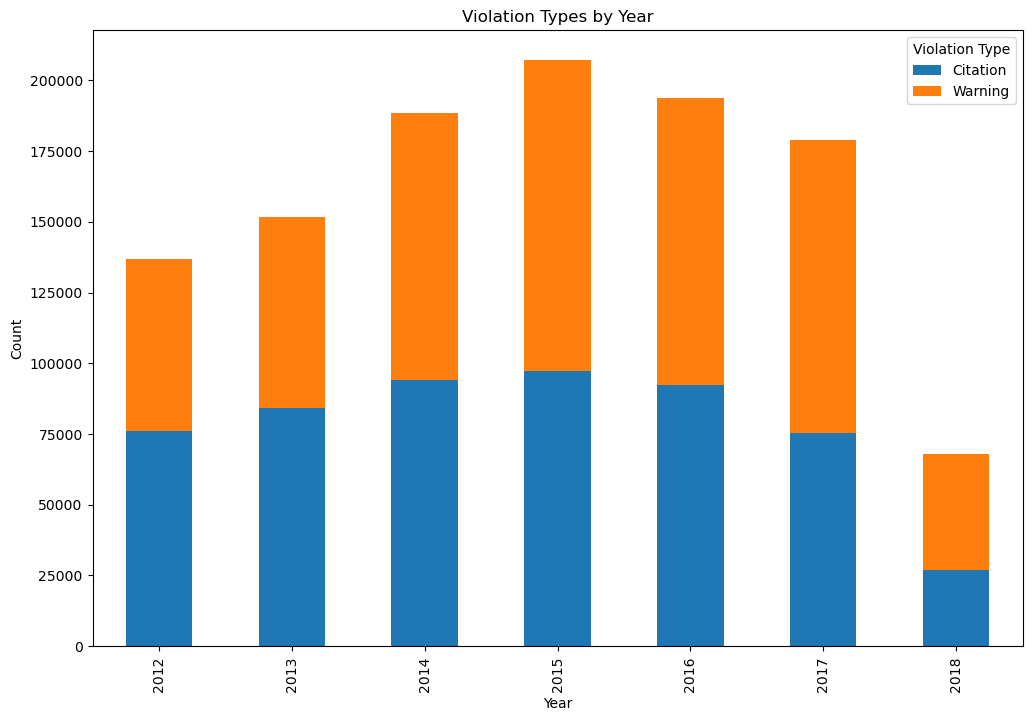

Summary statistics for violation types by hour:


Violation Type,Citation,Warning
Hour,,
0,29531,30854
1,25738,22858
2,22058,14759
3,16540,7906
4,9832,4614
5,6131,3538
6,9579,6726
7,20967,19635
8,31637,30212


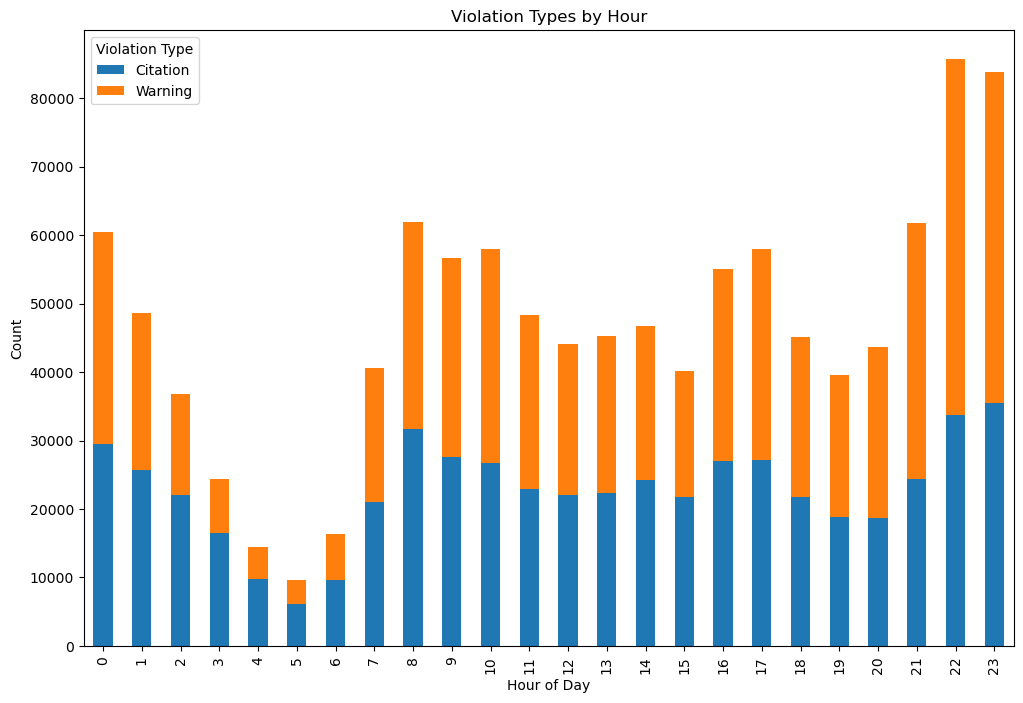

In [12]:
traffic_violations_df['Year'] = traffic_violations_df['Date Of Stop'].dt.year
traffic_violations_df['Hour'] = traffic_violations_df['Time Of Stop'].dt.hour


# Summary statistics for violation types by year
violation_by_year = traffic_violations_df.groupby('Year')['Violation Type'].value_counts().unstack(fill_value=0)
print("Summary statistics for violation types by year:")
display(violation_by_year)

# Plot violation types by year
violation_by_year.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Violation Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Violation Type')
plt.show()

# Summary statistics for violation types by hour
violation_by_hour = traffic_violations_df.groupby('Hour')['Violation Type'].value_counts().unstack(fill_value=0)
print("Summary statistics for violation types by hour:")
display(violation_by_hour)

# Plot violation types by hour
violation_by_hour.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Violation Types by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Violation Type')
plt.show()

In [13]:
most_violations_year = traffic_violations_df.groupby(['Violation Type', 'Year']).size().reset_index(name='Counts')
most_violations_year = most_violations_year.loc[most_violations_year.groupby('Violation Type')['Counts'].idxmax()]

print("Year with the most violations for each type:")
print(most_violations_year)


# Find the hour with the most violations for each type
most_violations_hour = traffic_violations_df.groupby(['Violation Type', 'Hour']).size().reset_index(name='Counts')
most_violations_hour = most_violations_hour.loc[most_violations_hour.groupby('Violation Type')['Counts'].idxmax()]

print("Hour with the most violations for each type:")
print(most_violations_hour)

Year with the most violations for each type:
   Violation Type  Year  Counts
3        Citation  2015   97388
10        Warning  2015  109979
Hour with the most violations for each type:
   Violation Type  Hour  Counts
23       Citation    23   35488
46        Warning    22   51982


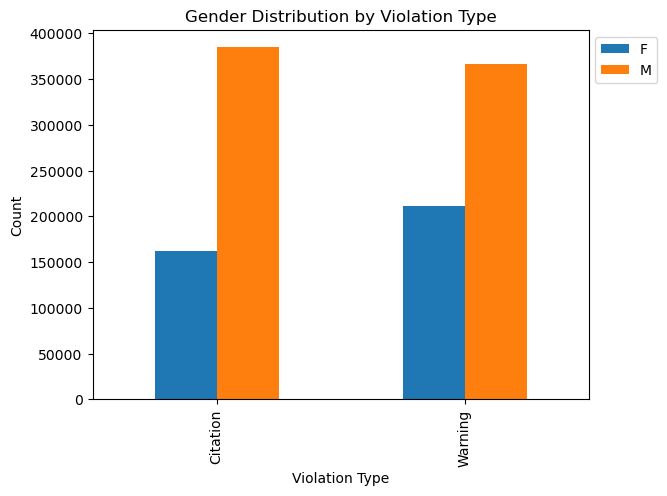

In [14]:
violationtype_by_gender = pd.crosstab(traffic_violations_df['Violation Type'], traffic_violations_df['Gender'])
violationtype_by_gender.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Gender Distribution by Violation Type')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.show()

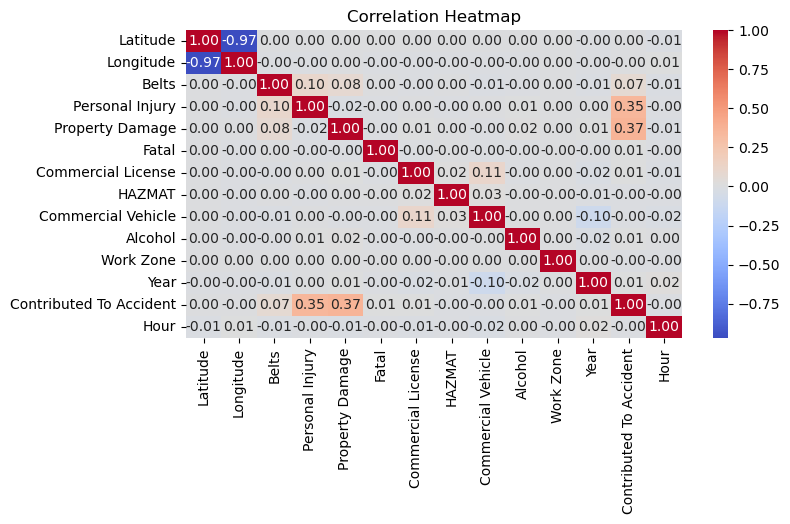

In [15]:
#Correlation

import seaborn as sns
numeric_cols = traffic_violations_df.select_dtypes(include=['float64', 'int64', 'string']).columns
numeric_df = traffic_violations_df[numeric_cols]

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Does gender influence citations?

- $H_{0}$: The gender does not have an effect on the likelihood of receiving a citation

- $H_{A}$: The gender does have an effect on the likelihood of receiving a citation

Our plan is to apply Chi-Squared Test. 

In [16]:
violationtype_by_gender = pd.crosstab(traffic_violations_df['Violation Type'], traffic_violations_df['Gender'])
violationtype_by_gender

Gender,F,M
Violation Type,,
Citation,162121,384416
Warning,211668,366751


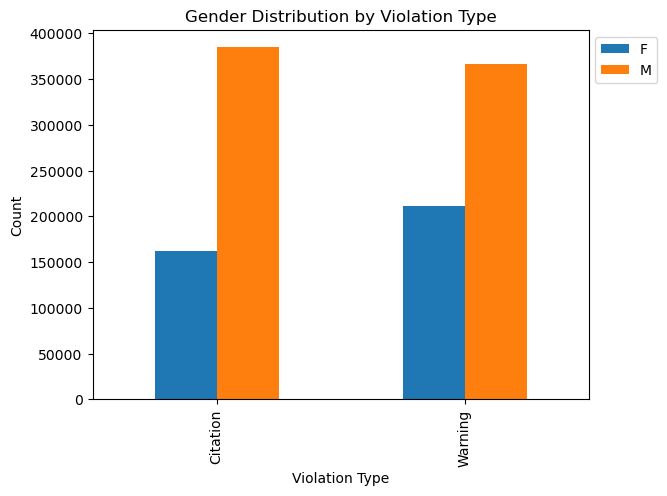

In [17]:
violationtype_by_gender.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Gender Distribution by Violation Type')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.show()

# Primary analysis

# Visualization

# Insights and Conclusions

In [18]:
traffic_violations_df["Violation Type"].value_counts()

Warning     578419
Citation    546537
Name: Violation Type, dtype: int64